In [1]:
import numpy as np
import pandas as pd

## Importing Libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

## Importing the Dataset

In [4]:
df = pd.read_csv('E:/data science/capstone Projects/Additional projects/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Checking correlation graph

<AxesSubplot:>

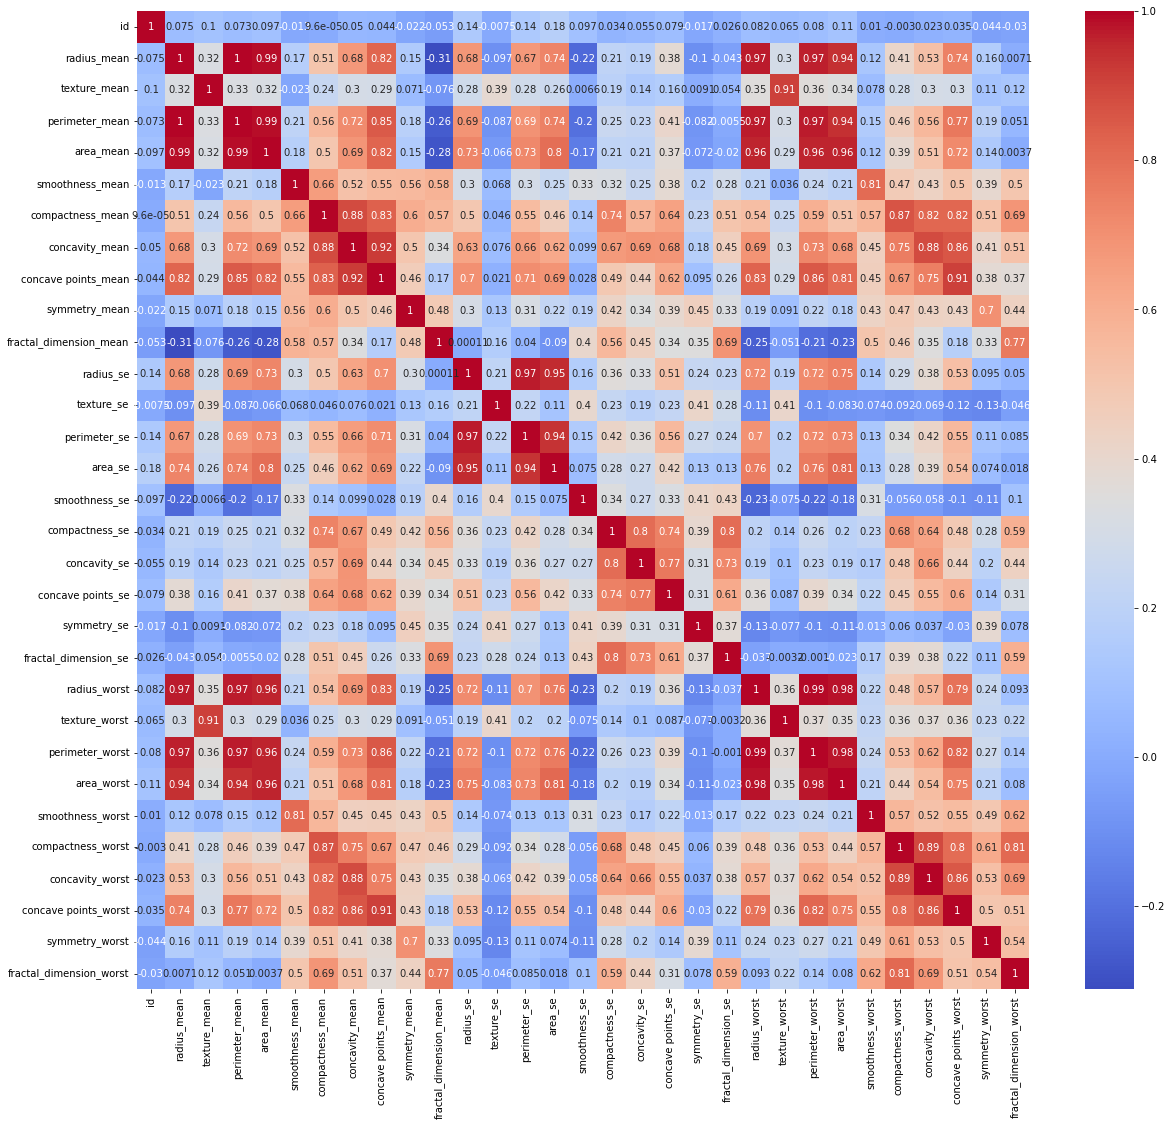

In [6]:
import matplotlib 
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

### Plotting variation between Mean Radius and Mean Texture 

<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

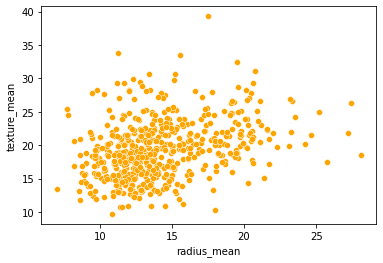

In [7]:
sns.scatterplot(x=df['radius_mean'],y=df['texture_mean'],color='orange')

### Plotting variation between Mean Concavity and Mean of (Concave Points)

<AxesSubplot:xlabel='concavity_mean', ylabel='concave points_mean'>

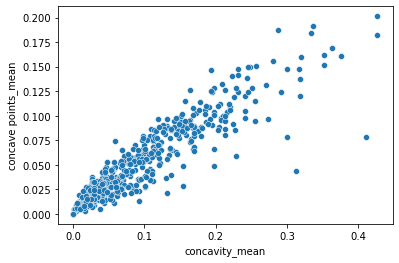

In [8]:
sns.scatterplot(x=df['concavity_mean'],y=df['concave points_mean'])

### Plotting variation of Mean Compactness and Mean Concavity

<AxesSubplot:xlabel='compactness_mean', ylabel='concavity_mean'>

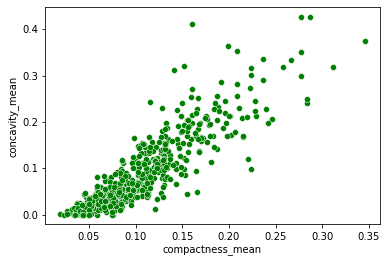

In [9]:
sns.scatterplot(x=df['compactness_mean'],y=df['concavity_mean'],color='green')


### Plotting variation between Mean Smoothness and Mean Symmetry

<AxesSubplot:xlabel='smoothness_mean', ylabel='symmetry_mean'>

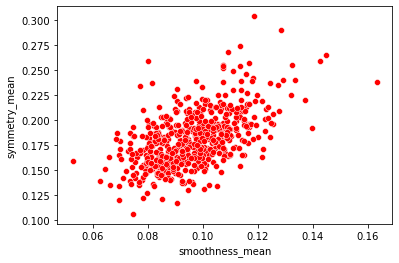

In [10]:
sns.scatterplot(x=df['smoothness_mean'],y=df['symmetry_mean'],color='red')

### Plotting Variation of Mean Compactness and Mean Fractal Dimension

<AxesSubplot:xlabel='compactness_mean', ylabel='fractal_dimension_mean'>

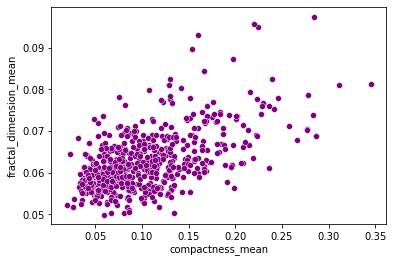

In [11]:
sns.scatterplot(x=df['compactness_mean'],y=df['fractal_dimension_mean'],color='purple')

### Plotting variation of Mean area and Mean of ( Concave Points )

<AxesSubplot:xlabel='area_mean', ylabel='concave points_mean'>

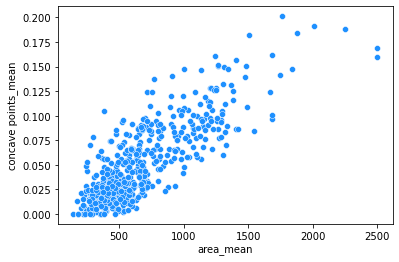

In [12]:
sns.scatterplot(x=df['area_mean'],y=df['concave points_mean'],color='dodgerblue')

### Plotting variation of Mean smoothness and Mean Fractal Dimension

<AxesSubplot:xlabel='smoothness_mean', ylabel='fractal_dimension_mean'>

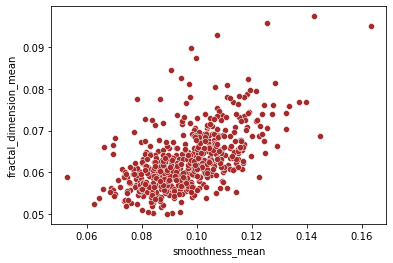

In [13]:
sns.scatterplot(x=df['smoothness_mean'],y=df['fractal_dimension_mean'],color='brown')

### Plotting variation Mean symmetry and Mean of ( Concave Points)

<AxesSubplot:xlabel='symmetry_mean', ylabel='concave points_mean'>

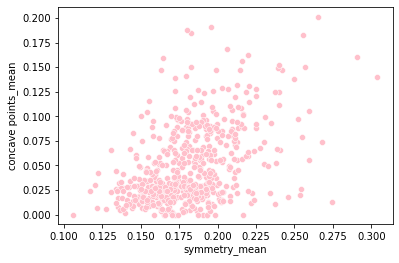

In [14]:
sns.scatterplot(x=df['symmetry_mean'],y=df['concave points_mean'],color='pink')

## Feature Engineering

### Checking Null Values

In [15]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Encoding Categorical Variable Diagnosis

In [16]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [17]:
def change(col):
    if col=='M':
        return 1
    else:
        return 0
df['diagnosis'] = df['diagnosis'].apply(change)

In [18]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Dropping id Column

In [19]:
df.drop(['id'],axis=1,inplace=True)

In [20]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Dividing Dataset into X and Y

In [21]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

## Dividing Dataset into Training and Test set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training Logistic Regression

In [24]:
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [25]:
y_pred1 = classifier1.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
print(accuracy_score(y_test, y_pred1))

[[65  2]
 [ 2 45]]
0.9649122807017544


## Training KNN

In [26]:
classifier2 = KNeighborsClassifier(n_neighbors = 5,metric='minkowski',p=2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred2 = classifier2.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
print(accuracy_score(y_test, y_pred2))

[[67  0]
 [ 5 42]]
0.956140350877193


## Training Naive Bayes

In [28]:
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)

GaussianNB()

In [29]:
y_pred3 = classifier3.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
print(accuracy_score(y_test, y_pred3))

[[61  6]
 [ 5 42]]
0.9035087719298246


## Training Kernel SVM

In [30]:
classifier4 = SVC(kernel = 'rbf', random_state = 0)
classifier4.fit(X_train, y_train)

SVC(random_state=0)

In [31]:
y_pred4 = classifier4.predict(X_test)
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
print(accuracy_score(y_test, y_pred4))

[[67  0]
 [ 2 45]]
0.9824561403508771


## Training Decision Tree 

In [32]:
classifier5 = DecisionTreeClassifier(random_state = 0,criterion='entropy')
classifier5.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
y_pred5 = classifier5.predict(X_test)
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)
print(accuracy_score(y_test, y_pred5))

[[62  5]
 [ 3 44]]
0.9298245614035088


## Training Random Forest 

In [34]:
classifier6 = RandomForestClassifier(criterion = 'entropy',random_state = 0,n_estimators = 10)
classifier6.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [35]:
y_pred6 = classifier6.predict(X_test)
cm6 = confusion_matrix(y_test, y_pred6)
print(cm6)
print(accuracy_score(y_test, y_pred6))

[[66  1]
 [ 2 45]]
0.9736842105263158
